In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import data_cleaner as dc # self-written function

In [2]:
raw = pd.read_csv("data/abundance_T.csv")

/var/folders/bm/s0j8htzs7tn4d1t__749xglm0000gn/T/ipykernel_1541/2984808478.py:1: DtypeWarning: Columns (2,5,9,20,26,42,47,51,52,59,61,68,76,77,78,79) have mixed types. Specify dtype option on import or set low_memory=False.
  raw = pd.read_csv("data/abundance_T.csv")


In [3]:
raw.head()

,dataset_name,sampleID,subjectID,bodysite,disease,age,gender,country,sequencing_technology,pubmedid,...,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_gilvus|t__Enterococcus_gilvus_unclassified,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis|t__GCF_000415925,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis|t__GCF_000215085,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Faecalibacterium|s__Faecalibacterium_prausnitzii|t__GCF_000209855,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1|t__GCF_000478965
0,Candela_Africa,H10,h10,stool,n,40,female,tanzania,Illumina,25981789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Candela_Africa,H11,h11,stool,n,29,female,tanzania,Illumina,25981789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Candela_Africa,H12,h12,stool,n,8,female,tanzania,Illumina,25981789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Candela_Africa,H13,h13,stool,n,34,male,tanzania,Illumina,25981789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Candela_Africa,H14,h14,stool,n,30,male,tanzania,Illumina,25981789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Note**

According to https://www.nature.com/articles/s41467-022-34405-3#Sec22, we kept the species level columns with more than 5% subjects with > 0.15% abundance


In [4]:
meta_cols = raw.columns[raw.columns.str.startswith("k__")]  # 3302 heirarchical microbiome expression data
meta_cols[:20]
s__lvl = raw.columns[raw.columns.str.contains('s__') & ~raw.columns.str.contains('t__')]
len(s__lvl)   # species level: 1291
(raw.loc[:,s__lvl].dtypes == "float64").value_counts() 
# > all float
data_s = raw.copy().loc[:,s__lvl]  # species data
data_not_meta = raw.copy().loc[:,~raw.columns.str.startswith("k__")] # not metagenomics data
thres1 = data_s.apply(lambda x:np.mean( x>0.0015 )>0.05 )
thres1.value_counts() 
# > 328 out of 1291 has more than 5% of subjects with > 0.15% relative abundance
data_s = data_s.loc[:,thres1]
data_s.shape

(3610, 328)

In [5]:
data_not_meta["infant_gender"].value_counts()
data_not_meta["gender"].value_counts()
pd.crosstab(data_not_meta["infant_gender"], data_not_meta["gender"])
# -> no overlap, infant info is differnt to subject info

gender,-,-,female,male,na,nd
infant_gender,,,,,,
female,0,0,0,0,0,206
male,0,0,0,0,0,252
nd,19,278,1237,1398,5,215


In [6]:
# overview of data:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
dc.overview(data_not_meta)
# > looks like unknown, missing, na, - were used as NaN
# > I guess "nd" means not detected -> turn to NaN
# > turn "none" to 0

size: (3610, 211)


,dtype,NaN_percentage,unique
dataset_name,object,0.0,"[Candela_Africa, Chatelier_gut_obesity, doyle_bt2, hmp, hmpii, Loman2013_EcoliOutbreak_DNA_HiSeq, Loman2013_EcoliOutbreak_DNA_MiSeq, metahit, Neilsen_genome_assembly, Psoriasis_2014, Quin_gut_liver_cirrhosis, Segre_Human_Skin, Tito_subsistence_gut, t2dmeta_long, t2dmeta_short, VerticalTransmissionPilot, WT2D, Zeller_fecal_colorectal_cancer]"
population,object,0.0,"[nd, tunapuco, norman, matses]"
pt,object,0.0,"[nd, -, 13.5, 12.6, 15.4, 13.6, 12, 13.3, 17.3, 14.2, 14.7, 18.8, 13.7, 15.2, 22.6, 16.4, 13.8, 19, 20, 12.4, 14.3, 12.8, 17.4, 12.7, 19.4, 17, 11.8, 16.6, 13.2, 15.3, 17.7, 11.4, 16.3, 14, 16.9, 16.2, 15.9, 13.1, 20.1, 17.8, 19.2, 15.7, 16.8, 24.2, 14.4, 15.5, 18.9, 18.6, 21.3, 13.9, 21.2, 17.1, 11.6, 11.9, 23.3, 15, 21, 27, 22.2, 11, 14.9, 13.4, 14.1, 12.1, 12.5, 23.2, 15.1, 19.6, 18.7]"
ascites,object,0.0,"[nd, -, mild, absent, sever]"
he,object,0.0,"[nd, -, none, grade_1]"
ctp,object,0.0,"[nd, -, 7, 5, 6, 9, 8, 10, 12, 13, 11, 14]"
meld,object,0.0,"[nd, -, -0.8, 0.3, 4.5, 3.6, 0.1, 5.1, 11.1, 5.6, 7, 6.5, 17.7, 8.7, 8.3, 23.4, 14.8, 3.3, 19.8, 14.5, 4.4, 11.6, 2.6, 14.1, 9.5, -0.6, 5.5, 6.9, 0.5, 11.8, 5.9, 4.2, 10.1, 18.5, 10.2, 9.4, 7.6, -0.4, 7.2, 9.9, 7.4, 0.6, 12.1, 11.3, 15.3, 14.2, 4.7, 7.9, 2.3, 13.5, 12.6, 10, 3.9, 11.7, 7.3, 7.1, 1.8, 6.1, 15.9, 6.2, 11.9, 12, 6.8, 13.1, 1.3, 3.5, 4, 5.4, 9.7, 13.3, -4.1, 1.6, 17.4, 3.2, 13.2, 17.2, -0.2, 3.8, 9.1, 21.1, 18.6, -6.1, 20, 6.6, 21.8, 7.8, 16.8, 3.1, 4.3, 15.6, 4.1, -2.3, 12.5, 7.7]"
antivirus,object,0.0,"[nd, -, entecavir, lamivudine_adefovir, none, lamivudine, telbivudine, lamivudine_foscarnet_sodium, adefovir]"
?-blocker,object,0.0,"[nd, -, none, propranolol]"
designation,object,0.0,"[nd, hv04_ac_l_u_ss_moist, hv04_ph_l_u_ss_moist, lowstaggered_mock_mock_u_na_na, hv04_ac_l:wga_u_ss_moist, hv04_ph_l:wga_u_ss_moist, hv04_n_l:wga_u_sw_moist, lowstaggered_mock_mock:wga_u_na_na, hv01_gb_null_u_ss_sebaceous, hv01_n_r_u_sw_moist, hv01_ch_r_u_ss_sebaceous, hv01_al_r_u_ss_sebaceous, hv01_ea_r_u_sw_sebaceous, hv01_ra_r_u_ss_sebaceous, hv01_mb_null_u_ss_sebaceous, hv01_ph_r_u_ss_moist, hv01_tn_r_u_qq_toenail, hv01_vf_r_u_ss_dry, hv01_ac_r_u_ss_moist, hv01_hp_r_u_ss_dry, hv01_id_r_u_ss_moist, hv01_ic_r_u_ss_moist, hv01_tw_r_u_ss_moist, hv01_oc_null_u_ss_sebaceous, hv01_ba_null_u_ss_sebaceous, hv01_pc_r_u_ss_moist, hv03_gb_null_u_ss_sebaceous, hv03_n_r_u_sw_moist, hv03_ch_r_u_ss_sebaceous, hv03_ea_r_u_sw_sebaceous, hv03_ra_r_u_ss_sebaceous, hv03_ic_r_u_ss_moist, hv03_tw_r_u_ss_moist, hv03_al_r_u_ss_sebaceous, hv03_vf_r_u_ss_dry, hv03_ac_r_u_ss_moist, hv03_hp_r_u_ss_dry, hv03_id_r_u_ss_moist, hv03_mb_null_u_ss_sebaceous, hv03_ph_r_u_ss_moist, hv03_tn_r_u_qq_toenail, hv03_oc_null_u_ss_sebaceous, hv03_ba_null_u_ss_sebaceous, hv03_pc_r_u_ss_moist, hv02_n_r_u_sw_moist, hv02_al_r_u_ss_sebaceous, hv02_ra_r_u_ss_sebaceous, hv02_mb_null_u_ss_sebaceous, hv02_ic_r_u_ss_moist, hv02_ph_r_u_ss_moist, hv02_tw_r_u_ss_moist, hv02_tn_r_u_qq_toenail, hv02_ba_null_u_ss_sebaceous, hv02_gb_null_u_ss_sebaceous, hv02_ch_r_u_ss_sebaceous, hv02_ea_r_u_sw_sebaceous, hv02_ac_r_u_ss_moist, hv02_hp_r_u_ss_dry, hv02_id_r_u_ss_moist, hv02_oc_null_u_ss_sebaceous, hv02_pc_r_u_ss_moist, hv04_gb_null_u_ss_sebaceous, hv04_n_r_u_sw_moist, hv04_ch_r_u_ss_sebaceous, hv04_al_r_u_ss_sebaceous, hv04_ea_r_u_sw_sebaceous, hv04_ra_r_u_ss_sebaceous, hv04_mb_null_u_ss_sebaceous, hv04_ic_r_u_ss_moist, hv04_ph_r_u_ss_moist, hv04_tw_r_u_ss_moist, hv04_tn_r_u_qq_toenail, hv04_oc_null_u_ss_sebaceous, hv04_ba_null_u_ss_sebaceous, hv04_pc_r_u_ss_moist, hv05_gb_null_u_ss_sebaceous, hv05_n_r_u_sw_moist, hv05_ch_r_u_ss_sebaceous, hv05_al_r_u_ss_sebaceous, hv05_ra_r_u_ss_sebaceous, hv05_hp_r_u_ss_dry, hv05_tw_r_u_ss_moist, hv05_oc_null_u_ss_sebaceous, hv05_ba_null_u_ss_sebaceous, hv05_ea_r_u_sw_sebaceous, hv05_ac_r_u_ss_moist, hv05_id_r_u_ss_moist, hv05_mb_null_u_ss_sebaceous, hv05_ic_r_u_ss_moist, hv05_ph_r_u_ss_moist, hv05_tn_r_u_qq_toenail, hv05_pc_r_u_ss_moist, sh01_ac_r_

In [7]:
(data_not_meta["?-blocker"]==None).value_counts() 
(data_not_meta["?-blocker"]=="none").value_counts()
# -> check if none is mis-identified as python None -> No
data_not_meta = data_not_meta.replace({})
data_not_meta = data_not_meta.replace({'none': 0, 'nd': np.nan, 'missing': np.nan,
                                       " -":np.nan, 'unknown':np.nan, '<1':0, # stec_coverage
                                       'na': np.nan, '-': np.nan}) 
(data_not_meta["wmsphase"]).value_counts()   # contains 1 & "1"
# -> need to transform object data to integer if possible
# data_not_meta["wmsphase"][data_not_meta["wmsphase"]==1] = "1"  # turn 1's to one groups
dc.overview(data_not_meta)

size: (3610, 211)


,dtype,NaN_percentage,unique
mlst_kp,object,0.997507,"[nan, salmonella_enterica, klebsiella_pneumoniae]"
st_kp,object,0.997507,"[nan, st-1714, st-429, st-223, st-36, st-611, st-909, st-234, st-144, st-34]"
stx_ratio,object,0.995845,"[nan, 5, 2, 3, 1, 0.4, 13, 8, 0.5]"
years_in_sweden,object,0.995845,"[nan, 40, 35, 38, 42, 24, 33, 34, 39, 37, 59, 60, 15]"
illumina_run,object,0.995291,"[nan, 1, 2]"
sample_group,object,0.995291,"[nan, 4, 1, 2, 3, 5]"
kit,object,0.995291,"[nan, qiagen_ministool, mbio_kit_food]"
known_consumers_of_a_defined_fermented_milk_product_(dfmp),object,0.994737,"[nan, dfmp]"
oral_anti-diabetic_medication,object,0.993906,"[nan, met, sulph]"
stooltexture,object,0.990028,"[nan, smooth, bloody, watery]"


In [8]:
check87 = data_not_meta.loc[~data_not_meta["mult_birth"].isna()]
# -> infant subjects, although have a lot more features to use, the sample size is small
x1 = dc.overview(check87)
print(f"Feature with < 0.2 missingness in the {check87.shape[0]} selected subjects. {x1.loc[x1.NaN_percentage < 0.2].shape}")
x1

size: (458, 211)
Feature with < 0.2 missingness in the 458 selected subjects. (47, 3)


,dtype,NaN_percentage,unique
sampleid_with_barcode,object,1.0,[nan]
population,object,1.0,[nan]
pt,object,1.0,[nan]
ascites,object,1.0,[nan]
he,object,1.0,[nan]
ctp,object,1.0,[nan]
meld,object,1.0,[nan]
antivirus,object,1.0,[nan]
?-blocker,object,1.0,[nan]
designation,object,1.0,[nan]


In [9]:
data_clean = data_not_meta.copy()
clean_process = dc.Cleaner(data_clean)

In [10]:
clean_process.rm_no_outcome(nm="disease")   # rm the ones with no outcome
clean_process.rm_na_cols(na_percentage=0.6)

In [11]:
dc.overview(data_clean)

size: (3108, 10)


,dtype,NaN_percentage,unique
gender,object,0.15444,"[female, male, nan]"
country,object,0.070463,"[tanzania, italy, denmark, usa, nan, germany, spain, china, peru, sweden, france, norway, slovakia, yugoslavia, hungary, estonia, finland, iceland]"
pubmedid,object,0.022523,"[25981789, 23985870, 23985870, 22699609, 22699609, 23571589, 20203603, 24997787, 24997787, nan, 25079328, 25079328, 25279917, 25807110, 23023125, 23023125, 23719380, 25432777, 25432777]"
#SampleID,object,0.012227,"[nan, Metaphlan2_Analysis]"
dataset_name,object,0.0,"[Candela_Africa, Chatelier_gut_obesity, hmp, hmpii, Loman2013_EcoliOutbreak_DNA_HiSeq, Loman2013_EcoliOutbreak_DNA_MiSeq, metahit, Neilsen_genome_assembly, Psoriasis_2014, Quin_gut_liver_cirrhosis, Segre_Human_Skin, Tito_subsistence_gut, t2dmeta_long, t2dmeta_short, WT2D, Zeller_fecal_colorectal_cancer]"
sampleID,object,0.0,"[H10, H11, H12, H13, H14, H15, H16, H17, H18, H19, H1, H20, H21, H22, H23, H24, H25, H26, H27, H2, H3, H4, H5, H6, H7, H8, H9, IT11, IT13, IT14, IT1, IT2, IT3, IT4, IT5, IT6, IT7, IT8, MH0002, MH0003, MH0006, MH0009, MH0011, MH0012, MH0014, MH0016, MH0020, MH0021, MH0024, MH0025, MH0026, MH0028, MH0030, MH0031, MH0032, MH0033, MH0034, MH0035, MH0036, MH0037, MH0038, MH0039, MH0040, MH0041, MH0042, MH0043, MH0044, MH0045, MH0046, MH0047, MH0048, MH0049, MH0050, MH0051, MH0052, MH0053, MH0054, MH0055, MH0056, MH0057, MH0058, MH0059, MH0060, MH0061, MH0062, MH0063, MH0064, MH0065, MH0066, MH0067, MH0068, MH0069, MH0070, MH0071, MH0072, MH0073, MH0074, MH0075, MH0076, MH0077, ...]"
subjectID,object,0.0,"[h10, h11, h12, h13, h14, h15, h16, h17, h18, h19, h1, h20, h21, h22, h23, h24, h25, h26, h27, h2, h3, h4, h5, h6, h7, h8, h9, it11, it13, it14, it1, it2, it3, it4, it5, it6, it7, it8, mh0002, mh0003, mh0006, mh0009, mh0011, mh0012, mh0014, mh0016, mh0020, mh0021, mh0024, mh0025, mh0026, mh0028, mh0030, mh0031, mh0032, mh0033, mh0034, mh0035, mh0036, mh0037, mh0038, mh0039, mh0040, mh0041, mh0042, mh0043, mh0044, mh0045, mh0046, mh0047, mh0048, mh0049, mh0050, mh0051, mh0052, mh0053, mh0054, mh0055, mh0056, mh0057, mh0058, mh0059, mh0060, mh0061, mh0062, mh0063, mh0064, mh0065, mh0066, mh0067, mh0068, mh0069, mh0070, mh0071, mh0072, mh0073, mh0074, mh0075, mh0076, mh0077, ...]"
bodysite,object,0.0,"[stool, tongue_dorsum, buccal_mucosa, supragingival_plaque, anterior_nares, posterior_fornix, l_retroauricular_crease, r_retroauricular_crease, saliva, keratinized_gingiva, palatine_tonsils, throat, subgingival_plaque, vaginal_introitus, mid_vagina, hard_palate, gomito_dx, gomito_sx, solco_retroauricolare_dx, solco_retroauricolare_sx, skin]"
disease,object,0.0,"[n, obesity, leaness, stec2-positive, ibd_ulcerative_colitis, ibd_crohn_disease, n_relative, y, cirrhosis, obese, overweight, underweight, t2d, impaired_glucose_tolerance, cancer, small_adenoma, large_adenoma]"
sequencing_technology,object,0.0,[Illumina]


In [12]:
print(data_clean["sampleID"].is_unique)
print(data_clean["subjectID"].is_unique)
data_clean.drop(['#SampleID', 'sequencing_technology','dataset_name']
                , axis=1, inplace=True)
# > drop '#SampleID', 'sequencing_technology' because useless
# > drop 'dataset_name' because data leakage

False
False


In [13]:
data_merge = pd.merge(data_clean, data_s, left_index=True, right_index=True)
print(f"Merge species data: {data_s.shape} with non-metagenomics data: {data_clean.shape} based on index. \nEnd up with {data_merge.shape}")
data_merge.head()

Merge species data: (3610, 328) with non-metagenomics data: (3108, 7) based on index. 
End up with (3108, 335)


,sampleID,subjectID,bodysite,disease,gender,country,pubmedid,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_graevenitzii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_odontolyticus,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_mucilaginosa,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_adolescentis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_bifidum,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_catenulatum,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_longum,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_pseudocatenulatum,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Gardnerella|s__Gardnerella_vaginalis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Adlercreutzia|s__Adlercreutzia_equolifaciens,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Atopobium|s__Atopobium_parvulum,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Atopobium|s__Atopobium_rimae,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Collinsella|s__Collinsella_aerofaciens,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Eggerthella|s__Eggerthella_lenta,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Eggerthella|s__Eggerthella_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Gordonibacter|s__Gordonibacter_pamelaeae,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Olsenella|s__Olsenella_unclassified,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides_caccae,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides_cellulosilyticus,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides_clarus,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides_coprocola,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides_coprophilus,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides_dorei,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides_eggerthii,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides_faecis,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides_finegoldii,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides_fragilis,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__B

In [14]:
# hard coding for the outcomes:
print(data_merge["disease"].value_counts() )
data_merge["disease"][data_merge["disease"]=="obese"] = "obesity"
data_merge["disease"][data_merge["disease"]=="overweight"] = "obesity"

n                             2054
t2d                            223
obesity                        164
ibd_ulcerative_colitis         148
cirrhosis                      118
leaness                         89
stec2-positive                  52
impaired_glucose_tolerance      49
cancer                          48
n_relative                      47
y                               36
small_adenoma                   26
ibd_crohn_disease               25
large_adenoma                   13
overweight                      10
obese                            5
underweight                      1
Name: disease, dtype: int64


/var/folders/bm/s0j8htzs7tn4d1t__749xglm0000gn/T/ipykernel_1541/2910662893.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_merge["disease"][data_merge["disease"]=="obese"] = "obesity"
/var/folders/bm/s0j8htzs7tn4d1t__749xglm0000gn/T/ipykernel_1541/2910662893.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_merge["disease"][data_merge["disease"]=="overweight"] = "obesity"


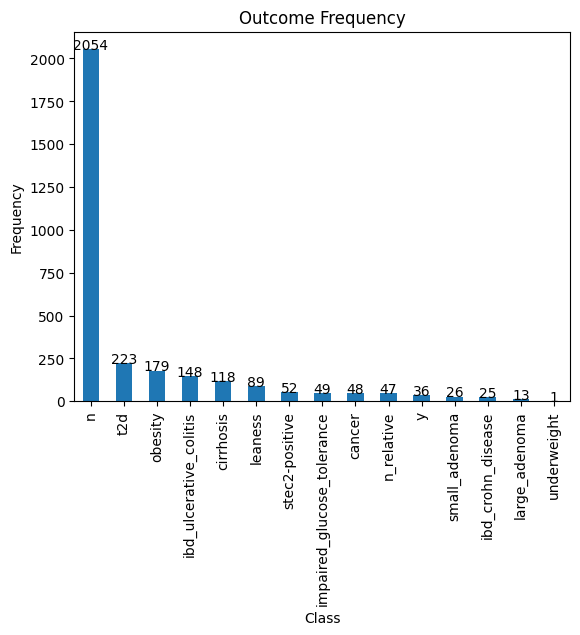

In [15]:
counts = data_merge["disease"].value_counts() 
ax = counts.plot.bar()
ax.set_title('Outcome Frequency')
ax.set_xlabel('Class')
ax.set_ylabel('Frequency')
for i, v in enumerate(counts):
    ax.text(i, v + 0.1, str(v), ha='center')
plt.show()

In [16]:
topn = 6
keep_gp = counts.index.to_list()[:topn]
data_merge = data_merge.loc[data_merge["disease"].isin(keep_gp)]

In [17]:
# Change dtypes:
dtypes = data_merge.apply(lambda x:x.dtype)
cate = data_merge.columns[dtypes=="object"].to_list()
print(data_merge.loc[:,cate].apply(lambda x:len(x.unique()))  )
# > unique values of non-numeric columns
data_merge.drop(['sampleID', 'subjectID', 'pubmedid']
                , axis=1, inplace=True)
dtypes = data_merge.apply(lambda x:x.dtype)
cate = data_merge.columns[dtypes=="object"].to_list()
# > rm sampleID & subject ID & pubmedid

sampleID     2577
subjectID    1392
bodysite       21
disease         6
gender          3
country        16
pubmedid       18
dtype: int64


In [18]:
# label encoding:
lbls = data_merge.loc[:,cate].apply(lambda x:pd.factorize(x)[1].to_list()) # labels
data_merge.loc[:,cate] = data_merge.loc[:,cate].apply(lambda x:pd.factorize(x)[0])
lb_tab = pd.DataFrame([])
for lb in lbls:
    lb = pd.Series(lb)
    lb_tab = pd.concat([lb_tab, lb], axis=1)
lb_tab.columns = cate
data_merge.iloc[:,:4] = data_merge.iloc[:,:4].replace(-1, np.nan)   
# > because NaN was replaced to -1 by pd.factorize

/var/folders/bm/s0j8htzs7tn4d1t__749xglm0000gn/T/ipykernel_1541/4020067893.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_merge.loc[:,cate] = data_merge.loc[:,cate].apply(lambda x:pd.factorize(x)[0])


In [19]:
data_merge.iloc[:,:4] = data_merge.iloc[:,:4].astype('Int64')
data_merge.gender.value_counts()

/var/folders/bm/s0j8htzs7tn4d1t__749xglm0000gn/T/ipykernel_1541/757372579.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_merge.iloc[:,:4] = data_merge.iloc[:,:4].astype('Int64')


1    1288
0    1144
Name: gender, dtype: Int64

In [20]:
lb_tab

,bodysite,disease,gender,country
0,stool,n,female,tanzania
1,tongue_dorsum,obesity,male,italy
2,buccal_mucosa,leaness,NaN,denmark
3,supragingival_plaque,ibd_ulcerative_colitis,NaN,usa
4,anterior_nares,cirrhosis,NaN,spain
5,posterior_fornix,t2d,NaN,china
6,l_retroauricular_crease,NaN,NaN,peru
7,r_retroauricular_crease,NaN,NaN,sweden
8,saliva,NaN,NaN,germany
9,keratinized_gingiva,NaN,NaN,france


In [21]:
int_cols = data_merge.select_dtypes(include=['int']).columns
for col in int_cols:
    print(data_merge[col].value_counts())

0     1701
20     291
1      174
3      162
2      151
4      123
5       78
7       33
6       26
16      16
17      11
12       8
11       7
9        6
10       6
8        5
18       5
13       3
14       2
19       2
15       1
Name: bodysite, dtype: Int64
0    2054
5     223
1     179
3     148
4     118
2      89
Name: disease, dtype: Int64
1    1288
0    1144
Name: gender, dtype: Int64
3     1075
5      576
2      514
4      186
7       84
9       48
1       45
6       28
0       27
8        4
10       1
11       1
12       1
13       1
14       1
Name: country, dtype: Int64


In [22]:
import re
new_nms = list(map(lambda col: re.sub(r'[^0-9a-zA-Z_]', '_', col).lower(), data_merge.columns))
data_merge.columns = new_nms

In [23]:
print(data_merge.shape)
data_merge.describe()
# -> top 6 categories have no NaN

(2811, 332)


,bodysite,disease,gender,country,k__archaea_p__euryarchaeota_c__methanobacteria_o__methanobacteriales_f__methanobacteriaceae_g__methanobrevibacter_s__methanobrevibacter_smithii,k__archaea_p__euryarchaeota_c__methanobacteria_o__methanobacteriales_f__methanobacteriaceae_g__methanobrevibacter_s__methanobrevibacter_unclassified,k__bacteria_p__actinobacteria_c__actinobacteria_o__actinomycetales_f__actinomycetaceae_g__actinomyces_s__actinomyces_graevenitzii,k__bacteria_p__actinobacteria_c__actinobacteria_o__actinomycetales_f__actinomycetaceae_g__actinomyces_s__actinomyces_odontolyticus,k__bacteria_p__actinobacteria_c__actinobacteria_o__actinomycetales_f__micrococcaceae_g__rothia_s__rothia_mucilaginosa,k__bacteria_p__actinobacteria_c__actinobacteria_o__actinomycetales_f__micrococcaceae_g__rothia_s__rothia_unclassified,k__bacteria_p__actinobacteria_c__actinobacteria_o__bifidobacteriales_f__bifidobacteriaceae_g__bifidobacterium_s__bifidobacterium_adolescentis,k__bacteria_p__actinobacteria_c__actinobacteria_o__bifidobacteriales_f__bifidobacteriaceae_g__bifidobacterium_s__bifidobacterium_bifidum,k__bacteria_p__actinobacteria_c__actinobacteria_o__bifidobacteriales_f__bifidobacteriaceae_g__bifidobacterium_s__bifidobacterium_catenulatum,k__bacteria_p__actinobacteria_c__actinobacteria_o__bifidobacteriales_f__bifidobacteriaceae_g__bifidobacterium_s__bifidobacterium_longum,k__bacteria_p__actinobacteria_c__actinobacteria_o__bifidobacteriales_f__bifidobacteriaceae_g__bifidobacterium_s__bifidobacterium_pseudocatenulatum,k__bacteria_p__actinobacteria_c__actinobacteria_o__bifidobacteriales_f__bifidobacteriaceae_g__gardnerella_s__gardnerella_vaginalis,k__bacteria_p__actinobacteria_c__actinobacteria_o__coriobacteriales_f__coriobacteriaceae_g__adlercreutzia_s__adlercreutzia_equolifaciens,k__bacteria_p__actinobacteria_c__actinobacteria_o__coriobacteriales_f__coriobacteriaceae_g__atopobium_s__atopobium_parvulum,k__bacteria_p__actinobacteria_c__actinobacteria_o__coriobacteriales_f__coriobacteriaceae_g__atopobium_s__atopobium_rimae,k__bacteria_p__actinobacteria_c__actinobacteria_o__coriobacteriales_f__coriobacteriaceae_g__collinsella_s__collinsella_aerofaciens,k__bacteria_p__actinobacteria_c__actinobacteria_o__coriobacteriales_f__coriobacteriaceae_g__eggerthella_s__eggerthella_lenta,k__bacteria_p__actinobacteria_c__actinobacteria_o__coriobacteriales_f__coriobacteriaceae_g__eggerthella_s__eggerthella_unclassified,k__bacteria_p__actinobacteria_c__actinobacteria_o__coriobacteriales_f__coriobacteriaceae_g__gordonibacter_s__gordonibacter_pamelaeae,k__bacteria_p__actinobacteria_c__actinobacteria_o__coriobacteriales_f__coriobacteriaceae_g__olsenella_s__olsenella_unclassified,k__bacteria_p__bacteroidetes_c__bacteroidia_o__bacteroidales_f__bacteroidaceae_g__bacteroides_s__bacteroides_caccae,k__bacteria_p__bacteroidetes_c__bacteroidia_o__bacteroidales_f__bacteroidaceae_g__bacteroides_s__bacteroides_cellulosilyticus,k__bacteria_p__bacteroidetes_c__bacteroidia_o__bacteroidales_f__bacteroidaceae_g__bacteroides_s__bacteroides_clarus,k__bacteria_p__bacteroidetes_c__bacteroidia_o__bacteroidales_f__bacteroidaceae_g__bacteroides_s__bacteroides_coprocola,k__bacteria_p__bacteroidetes_c__bacteroidia_o__bacteroidales_f__bacteroidaceae_g__bacteroides_s__bacteroides_coprophilus,k__bacteria_p__bacteroidetes_c__bacteroidia_o__bacteroidales_f__bacteroidaceae_g__bacteroides_s__bacteroides_dorei,k__bacteria_p__bacteroidetes_c__bacteroidia_o__bacteroidales_f__bacteroidaceae_g__bacteroides_s__bacteroides_eggerthii,k__bacteria_p__bacteroidetes_c__bacteroidia_o__bacteroidales_f__bacteroidaceae_g__bacteroides_s__bacteroides_faecis,k__bacteria_p__bacteroidetes_c__bacteroidia_o__bacteroidales_f__bacteroidaceae_g__bacteroides_s__bacteroides_finegoldii,k__bacteria_p__bacteroidetes_c__bacteroidia_o__bacteroidales_f__bacteroidaceae_g__bacteroides_s__bacteroides_fragilis,k__bacteria_p__bacteroidetes_c__bacteroidia_o__bacteroidales_f__bacteroidaceae_g__bacteroides_s__bacteroides_intestinalis,k__b

In [24]:
data_merge = data_merge.reset_index(drop=True) # reset index
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2811 entries, 0 to 2810
Columns: 332 entries, bodysite to k__eukaryota_p__basidiomycota_c__exobasidiomycetes_o__malasseziales_f__malasseziaceae_g__malassezia_s__malassezia_globosa
dtypes: Int64(4), float64(328)
memory usage: 7.1 MB


In [25]:
# to abbreviate species name:
species_nm = pd.Series(data_merge.columns[4:]).str.split('s__').apply(lambda x:x[-1])
newnm = ['bodysite','disease','gender','country']
newnm.extend(species_nm)
data_merge.columns = newnm
data_merge.head()

,bodysite,disease,gender,country,methanobrevibacter_smithii,methanobrevibacter_unclassified,actinomyces_graevenitzii,actinomyces_odontolyticus,rothia_mucilaginosa,rothia_unclassified,bifidobacterium_adolescentis,bifidobacterium_bifidum,bifidobacterium_catenulatum,bifidobacterium_longum,bifidobacterium_pseudocatenulatum,gardnerella_vaginalis,adlercreutzia_equolifaciens,atopobium_parvulum,atopobium_rimae,collinsella_aerofaciens,eggerthella_lenta,eggerthella_unclassified,gordonibacter_pamelaeae,olsenella_unclassified,bacteroides_caccae,bacteroides_cellulosilyticus,bacteroides_clarus,bacteroides_coprocola,bacteroides_coprophilus,bacteroides_dorei,bacteroides_eggerthii,bacteroides_faecis,bacteroides_finegoldii,bacteroides_fragilis,bacteroides_intestinalis,bacteroides_massiliensis,bacteroides_nordii,bacteroides_ovatus,bacteroides_plebeius,bacteroides_salyersiae,bacteroides_stercoris,bacteroides_thetaiotaomicron,bacteroides_uniformis,bacteroides_vulgatus,bacteroides_xylanisolvens,bacteroidales_bacterium_ph8,barnesiella_intestinihominis,coprobacter_fastidiosus,odoribacter_splanchnicus,odoribacter_unclassified,parabacteroides_distasonis,parabacteroides_goldsteinii,parabacteroides_merdae,parabacteroides_unclassified,alloprevotella_unclassified,paraprevotella_clara,paraprevotella_unclassified,paraprevotella_xylaniphila,prevotella_bivia,prevotella_copri,prevotella_stercorea,alistipes_finegoldii,alistipes_indistinctus,alistipes_onderdonkii,alistipes_putredinis,alistipes_senegalensis,alistipes_shahii,alistipes_sp_ap11,alistipes_unclassified,granulicatella_unclassified,lactobacillus_ruminis,lactococcus_lactis,streptococcus_anginosus,streptococcus_australis,streptococcus_gordonii,streptococcus_infantis,streptococcus_mitis_oralis_pneumoniae,streptococcus_parasanguinis,streptococcus_salivarius,streptococcus_thermophilus,streptococcus_vestibularis,clostridium_asparagiforme,clostridium_bolteae,clostridium_citroniae,clostridium_clostridioforme,clostridium_hathewayi,clostridium_leptum,clostridium_nexile,clostridium_perfringens,clostridium_sp_l2_50,clostridium_symbiosum,parvimonas_unclassified,clostridiales_bacterium_1_7_47faa,flavonifractor_plautii,pseudoflavonifractor_capillosus,eubacterium_brachy,eubacterium_eligens,eubacterium_hallii,eubacterium_ramulus,eubacterium_rectale,eubacterium_siraeum,eubacterium_ventriosum,anaerostipes_hadrus,blautia_hydrogenotrophica,ruminococcus_gnavus,ruminococcus_obeum,ruminococcus_torques,butyrivibrio_crossotus,butyrivibrio_unclassified,coprococcus_catus,coprococcus_comes,coprococcus_eutactus,coprococcus_sp_art55_1,dorea_formicigenerans,dorea_longicatena,dorea_unclassified,lachnospiraceae_bacterium_1_1_57faa,lachnospiraceae_bacterium_1_4_56faa,lachnospiraceae_bacterium_2_1_58faa,lachnospiraceae_bacterium_3_1_46faa,lachnospiraceae_bacterium_3_1_57faa_ct1,lachnospiraceae_bacterium_5_1_63faa,lachnospiraceae_bacterium_7_1_58faa,lachnospiraceae_bacterium_8_1_57faa,lachnospiraceae_bacterium_9_1_43bfaa,roseburia_hominis,roseburia_intestinalis,roseburia_inulinivorans,roseburia_unclassified,oscillibacter_unclassified,clostridium_bartlettii,peptostreptococcaceae_noname_unclassified,peptostreptococcus_unclassified,anaerotruncus_colihominis,anaerotruncus_unclassified,faecalibacterium_prausnitzii,ruminococcaceae_bacterium_d16,ruminococcus_albus,ruminococcus_bromii,ruminococcus_callidus,ruminococcus_flavefaciens,ruminococcus_lactaris,ruminococcus_sp_5_1_39bfaa,subdoligranulum_unclassified,subdoligranulum_variabile,catenibacterium_mitsuokai,clostridium_innocuum,erysipelotrichaceae_bacterium_2_2_44a,erysipelotrichaceae_bacterium_6_1_45,eubacterium_biforme,eubacterium_cylindroides,holdemania_filiformis,solobacterium_moorei,turicibacter_sanguinis,turicibacter_unclassified,acidaminococcus_unclassified,phascolarctobacterium_succinatutens,dialister_invisus,megasphaera_unclassified,mitsuokella_unclassified,veillonella_atypica,veillonella_dispar,veillonella_parvula,veillonella_unclassified,fusobacterium_nucleatum,burkholderiales_bacteriu

In [26]:
# save csv:
data_merge.to_csv("data/data_species_.csv",index=False )
# # save pickle:
dc.save_py(data_merge, "data/data_species.pkl")

In [34]:
df = dc.load_py('data/data_species.pkl')

In [37]:
x1 = df.iloc[:,:4].apply(lambda x:x.isna())
pd.crosstab(x1['gender'], x1['country'])

country,False,True
gender,,
False,2213,219
True,379,0


In [28]:
np.random.seed(1) 
idx = np.arange(len(df))
np.random.shuffle(idx)          # shuffle idx
test_sz = int(len(idx) * 0.3 )  # 0.3 for testing
test = df.iloc[idx[:test_sz]]
train = df.iloc[idx[test_sz:]]
print(f"Train set size: {train.shape}\nTest set size: {test.shape}")
# sum(train.index.isin(test.index) ) # no overlap

Train set size: (1968, 332)
Test set size: (843, 332)


In [30]:
# imputation for categorical data using KNN:
from sklearn.impute import KNNImputer
# training set:
train_y = train.pop('disease')
imputer = KNNImputer(n_neighbors=1) # closest point to impute
imputer.fit_transform(train)
train[train.columns[:]]  = imputer.fit_transform(train, y=train_y)
train.loc[:,'disease'] = train_y

# testing set:
test_y = test.pop('disease')
imputer = KNNImputer(n_neighbors=1)
imputer.fit_transform(test)
test[test.columns[:]]  = imputer.fit_transform(test, y=test_y)
test.loc[:,'disease'] = test_y

# change order to make outcome in 1st column:
cols = train.columns.tolist()
cols = cols[-1:] + cols[:-1]
train = train[cols]
test = test[cols]

/var/folders/bm/s0j8htzs7tn4d1t__749xglm0000gn/T/ipykernel_1541/4118049.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[train.columns[:]]  = imputer.fit_transform(train, y=train_y)
/var/folders/bm/s0j8htzs7tn4d1t__749xglm0000gn/T/ipykernel_1541/4118049.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train.loc[:,'disease'] = train_y
/var/folders/bm/s0j8htzs7tn4d1t__749xglm0000gn/T/ipykernel_1541/4118049.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [31]:
train.to_pickle("data/train_set.pkl")
test.to_pickle("data/test_set.pkl")

In [32]:
dc.overview(train).head()

size: (1968, 332)


,dtype,NaN_percentage,unique
disease,Int64,0.0,"[0, 5, 3, 4, 1, 2]"
oscillibacter_sp_kle_1745,float64,0.0,"[0.0, 0.71595, 0.42466, 0.44785, 0.13028, 0.26119, 0.17472, 0.40482, 1.05451, 0.18869, 0.14702, 0.49911, 0.42031, 0.15929, 0.25798, 0.16703, 0.32554, 0.39957, 0.16259, 1.54552, 0.07948, 0.66542, 0.44899, 0.63005, 0.17161, 1.30189, 0.58739, 0.08167, 0.26308, 0.27141, 0.22954, 0.37804, 0.58741, 0.1195, 0.36883, 0.27275, 0.547, 0.18797, 0.62397, 0.39542, 0.24465, 0.10013, 0.40252, 0.20879, 0.81041, 1.76684, 0.16411, 0.40508, 0.19482, 0.55292, 0.49234, 0.30978, 0.09219, 0.64666, 0.31706, 0.42767, 0.46722, 0.35282, 0.34046, 0.48348, 0.08772, 1.45342, 0.30616, 3.47509, 0.13362, 0.73453, 0.10461, 0.38473, 0.20657, 2.18715, 0.38117, 0.50328, 0.94699, 1.61947, 0.76191, 0.64878, 0.23871, 0.08978, 0.21301, 0.20484, 0.32261, 0.29682, 2.15704, 0.18225, 0.27297, 0.25355, 0.64547, 0.26323, 0.19856, 0.60828, 0.09548, 3.8369, 0.48989, 0.21922, 0.33199, 0.15021, 0.11166, 0.15413, 0.30146, 0.40342, ...]"
oribacterium_sinus,float64,0.0,"[0.0, 0.00339, 0.13488, 0.67018, 0.31436, 0.07652, 7e-05, 0.07378, 0.23401, 0.50935, 3.31908, 0.00012, 0.16554, 0.08696, 0.00621, 0.76765, 0.0842, 0.00011, 0.00203, 1.44861, 0.67645, 0.04669, 0.00067, 0.33993, 2.04638, 0.00974, 0.0047, 0.00291, 0.00102, 0.55047, 0.00287, 3.11286, 0.00552, 0.64109, 0.0273, 0.67984, 0.72977, 0.72287, 0.38236, 0.00734, 0.22572, 0.00184, 0.02165, 0.00241, 1.10838, 1.13711, 2.41844, 0.00422, 0.80557, 0.00232, 2.22957, 1.27675, 1.74179, 0.64872, 1.9422, 1.63714, 0.48097, 0.20503, 0.02552, 0.0055, 0.00163, 0.41775, 1.40193, 0.03817, 0.06083, 0.05065, 0.00043, 0.00095, 0.01152, 0.96025, 0.00016, 0.62053, 0.00838, 0.03194, 0.03818, 4.01163, 0.1206, 0.09221, 0.31096, 1.33579, 0.03263, 0.54447, 0.00101, 0.00122, 0.42996, 0.00064, 0.00052, 0.07744, 0.39551, 0.61284, 1.90918, 0.5302, 0.00248, 0.00406, 0.03024, 0.69209, 0.33161, 0.00774, 0.43551, 0.00305, ...]"
lachnospiraceae_bacterium_oral_taxon_082,float64,0.0,"[0.0, 0.00128, 0.23739, 0.06238, 0.01289, 0.00568, 0.16238, 0.05555, 0.04747, 0.00064, 0.01241, 0.06548, 0.05419, 0.06093, 0.00856, 0.00575, 0.00143, 0.01855, 0.04482, 0.04764, 0.20179, 0.85356, 0.24752, 0.00249, 0.0003, 0.04702, 0.00391, 0.02323, 0.00603, 0.55414, 0.08963, 0.28405, 0.02295, 0.36713, 0.00277, 0.17099, 1.0789, 0.03567, 0.07065, 0.12498, 0.20655, 0.07385, 0.78639, 0.00173, 0.01055, 0.07273, 0.00376, 0.13395, 0.03416, 0.08721, 0.01112, 0.23683, 0.06281, 1.83164, 0.00058, 0.65185, 0.01881, 0.08033, 0.00053, 0.00875, 0.35927, 0.00419, 0.00124, 0.05301, 0.05337, 0.00011, 0.00653, 0.0117, 0.00131, 0.51804, 0.00734, 0.10003, 0.00404, 0.00513, 0.17424, 1.01672, 0.70928, 0.00177, 0.02064, 0.16907, 0.00158, 0.30102, 0.00921, 0.00125, 0.03246, 0.26107, 0.14451, 0.04983, 0.06422, 0.10549, 0.01887, 0.0265, 0.0017, 0.01713, 0.01935, 0.00577, 0.03625, 0.43643, 0.00619, 0.09401, ...]"
lachnospiraceae_bacterium_icm7,float64,0.0,"[0.0, 0.01816, 0.02883, 0.41948, 0.05298, 0.17806, 0.09955, 0.02405, 0.1074, 0.35374, 0.01203, 0.97555, 0.0117, 0.10779, 0.00137, 0.25086, 0.03833, 0.29126, 0.05647, 0.04167, 0.0235, 0.11828, 0.49614, 0.00015, 0.02581, 0.01447, 0.00357, 0.34496, 0.0619, 0.30951, 0.17373, 2.17742, 0.05109, 0.28808, 0.0284, 0.32732, 0.04006, 0.0503, 0.06838, 0.05105, 0.08319, 0.02351, 0.12429, 0.51722, 0.49774, 0.01942, 0.03765, 0.10375, 0.13675, 0.26094, 0.19846, 0.70179, 0.04936, 0.51928, 1.39931, 0.00558, 0.04815, 0.02603, 0.11746, 0.02634, 0.24895, 0.08332, 0.06017, 0.00189, 0.09039, 0.0043, 0.00517, 0.63003, 0.00057, 0.02752, 0.10422, 0.5326, 0.42825, 0.00462, 0.11163, 0.51127, 0.00775, 0.21375, 0.21127, 0.06794, 0.08825, 0.00734, 0.09026, 0.50888, 0.19654, 0.1317, 0.08574, 0.22554, 0.06936, 0.0165, 0.0798, 0.0085, 0.00902, 0.2099, 0.05908, 0.02202, 0.02666, 0.00242, 0.00354, 0.0728, ...]"


In [33]:
# split train set to 3 validation sets for 3-fold CV
train = train.reset_index(drop=True)
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=3, random_state=10, shuffle=True)
i = 0
for train_index, test_index in skf.split(train, train['disease']):
    i += 1
    train_d = train.loc[train_index,:].reset_index(drop=True)
    validate_d = train.loc[test_index,:].reset_index(drop=True)
    train_d.to_pickle(f"data/v{i}_train.pkl")
    validate_d.to_pickle(f"data/v{i}_validate.pkl")